<a href="https://colab.research.google.com/github/Satyam-BIT24/Sugarcane_DL_Model/blob/main/Sugarcane_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
import shutil
import glob

In [3]:
!wget https://www.dropbox.com/s/6kn6lhzwu86cblu/Sugarcane.zip?dl=0
!unzip /content/Sugarcane.zip?dl=0
!unzip /content/Sugarcane/Test.zip
!unzip /content/Sugarcane/Train.zip


--2022-05-07 02:48:47--  https://www.dropbox.com/s/6kn6lhzwu86cblu/Sugarcane.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/6kn6lhzwu86cblu/Sugarcane.zip [following]
--2022-05-07 02:48:47--  https://www.dropbox.com/s/raw/6kn6lhzwu86cblu/Sugarcane.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucaea8eb8121334982045f0c9c96.dl.dropboxusercontent.com/cd/0/inline/BkwByEHwHomvEjtfHOyJLMKpmqxpMh_QSm_x4vs5y5MeKHQ5CiuwvxSsWfDBz7D1TfATdLJa6v3Vwq-2_5dopiIBJbft1jmAVu2WVvELtdQBz2BqflZPl1aY1E05gJrkfxYhuPmqjfQ1sE1Y_keFZAFxBJIGeZd_PYSshr9Uzbu5Bg/file# [following]
--2022-05-07 02:48:47--  https://ucaea8eb8121334982045f0c9c96.dl.dropboxusercontent.com/cd/0/inline/BkwByEHwHomvEjtfHOyJLMKpmqxpMh_QSm_x4vs5y5MeKHQ5CiuwvxSsWfDB

In [4]:
Train_dir="./DATASET"
ORG_dir="/content/Train"
CLASS=["S_H","S_BLB"]

In [5]:
for C in CLASS:
   DEST=os.path.join(Train_dir,C)

   if not os.path.exists(DEST):
     os.makedirs(DEST)

   for img_path in glob.glob(os.path.join(ORG_dir,C)+"*"):
     SRC=img_path

     shutil.copy(SRC,DEST) 




In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import keras


In [20]:
base_model=InceptionV3(input_shape=(256,256,3),include_top=False)

In [21]:
for layer in base_model.layers:
  layer.trainable=False

In [22]:
X=Flatten()(base_model.output)
X=Dense(units=2,activation='sigmoid')(X)

model=Model(base_model.input, X)

In [23]:
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 127, 127, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 127, 127, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [24]:
train_datagen=ImageDataGenerator(featurewise_center=True, 
                                 rotation_range=0.5, 
                                 width_shift_range=0.3,
                                 horizontal_flip=True,
                                 preprocessing_function=preprocess_input,
                                 zoom_range=0.4,
                                 shear_range=0.4)

train_data=train_datagen.flow_from_directory(directory="/content/DATASET",target_size=(256,256))

Found 140 images belonging to 2 classes.


In [25]:
train_data.class_indices

{'S_BLB': 0, 'S_H': 1}

In [26]:
t_img,label=train_data.next()

In [27]:
t_img.shape

(32, 256, 256, 3)

In [28]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

mc=ModelCheckpoint(filepath="./best_model.h5",
                   monitor="accuracy",
                   verbose=1,
                   save_best_only=True)

es=EarlyStopping(monitor="accuracy",
                 min_delta=0.01,
                 patience=5,
                 verbose=1,)

cb=[mc,es]

In [29]:
his=model.fit_generator(train_data,
                        steps_per_epoch=5,
                        epochs=3,
                        callbacks=cb)

Epoch 1/3
5/5 [==============================] - ETA: 0s - loss: 4.4779 - accuracy: 0.5357
Epoch 1: accuracy improved from -inf to 0.53571, saving model to ./best_model.h5
5/5 [==============================] - 50s 9s/step - loss: 4.4779 - accuracy: 0.5357
Epoch 2/3
5/5 [==============================] - ETA: 0s - loss: 2.7591 - accuracy: 0.6714
Epoch 2: accuracy improved from 0.53571 to 0.67143, saving model to ./best_model.h5
5/5 [==============================] - 44s 9s/step - loss: 2.7591 - accuracy: 0.6714
Epoch 3/3
5/5 [==============================] - ETA: 0s - loss: 1.3586 - accuracy: 0.8429
Epoch 3: accuracy improved from 0.67143 to 0.84286, saving model to ./best_model.h5
5/5 [==============================] - 44s 9s/step - loss: 1.3586 - accuracy: 0.8429


In [30]:
from keras.models import load_model

model=load_model("/content/best_model.h5")

In [31]:
h=his.history
h.keys()

dict_keys(['loss', 'accuracy'])

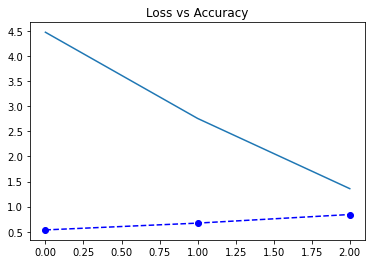

In [33]:
plt.plot(h['loss'])
plt.plot(h['accuracy'],'go--',c='blue')

plt.title("Loss vs Accuracy")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bacterial Infected Sugarcane


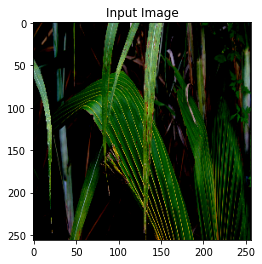

In [36]:
path="/content/Test/21.JPG"
img=load_img(path,target_size=(256,256))

i=img_to_array(img)
i=preprocess_input(i)
input_arr=np.array([i])
input_arr.shape

pred=np.argmax(model.predict(input_arr))

if pred==0:
  print("Bacterial Infected Sugarcane")
else:
  print("Healthy Sugarcane")

plt.imshow(input_arr[0])
plt.title("Input Image")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Healthy Sugarcane


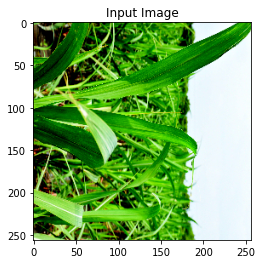

In [37]:
path="/content/Test/87.JPG"
img=load_img(path,target_size=(256,256))

i=img_to_array(img)
i=preprocess_input(i)
input_arr=np.array([i])
input_arr.shape

pred=np.argmax(model.predict(input_arr))

if pred==0:
  print("Bacterial Infected Sugarcane")
else:
  print("Healthy Sugarcane")

plt.imshow(input_arr[0])
plt.title("Input Image")
plt.show()